In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('marketing_campaign.csv')

Saving marketing_campaign.csv to marketing_campaign.csv


In [3]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [4]:
df.shape

(365, 17)

In [5]:
df.dtypes

,0
Date,object
Facebook Ad Campaign,object
Facebook Ad Views,int64
Facebook Ad Clicks,int64
Facebook Ad Conversions,int64
Cost per Facebook Ad,object
Facebook Click-Through Rate (Clicks / View),object
Facebook Conversion Rate (Conversions / Clicks),object
Facebook Cost per Click (Ad Cost / Clicks),object
AdWords Ad Campaign,object


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


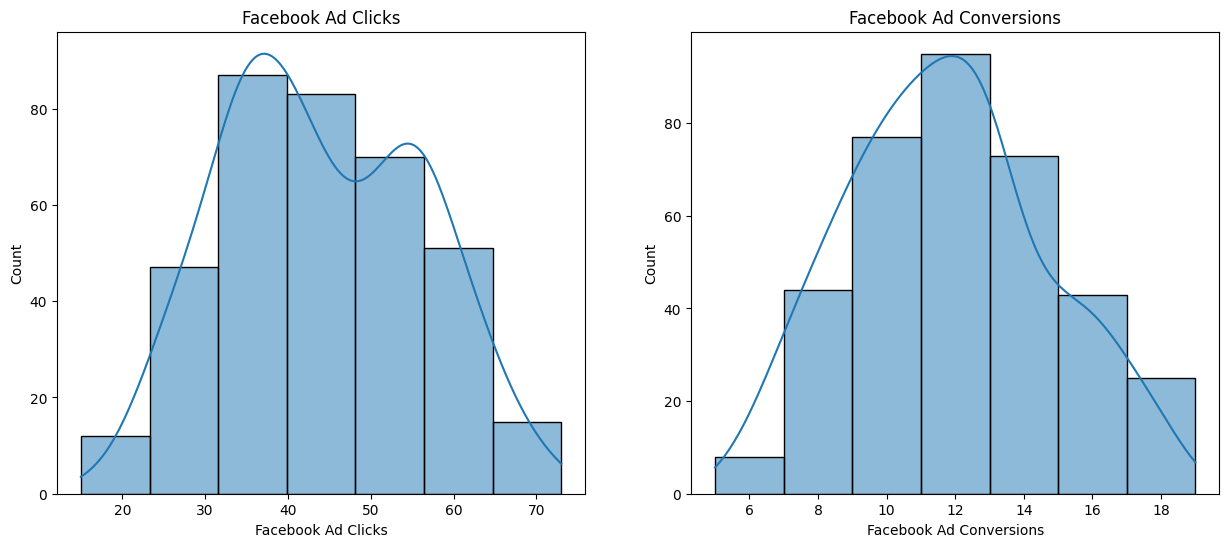

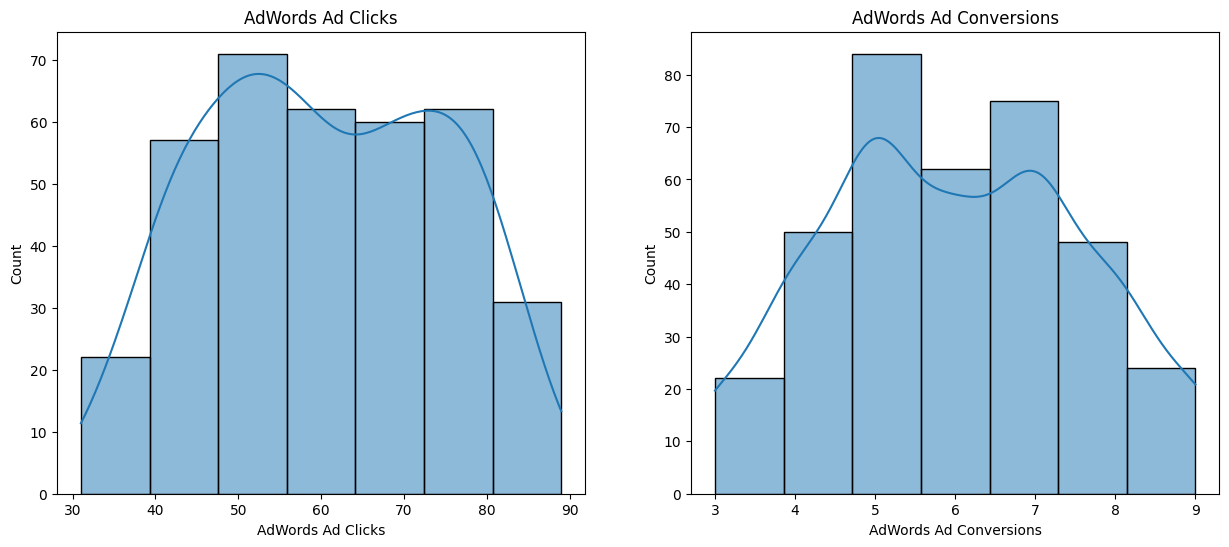

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'], bins=7, edgecolor='k', kde=True)

plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'], bins=7, edgecolor='k', kde=True)

plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

In [8]:
df['Facebook Ad Conversions']

,Facebook Ad Conversions
0,8
1,12
2,8
3,9
4,7
...,...
360,13
361,18
362,13
363,8


In [9]:
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6-10')
        elif 11 <= conversion < 16:
            category.append('10-15')
        else:
            category.append('more than 15')
    return category

In [10]:
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [11]:
print(df.columns.tolist())

['Date', 'Facebook Ad Campaign', 'Facebook Ad Views', 'Facebook Ad Clicks', 'Facebook Ad Conversions', 'Cost per Facebook Ad', 'Facebook Click-Through Rate (Clicks / View)', 'Facebook Conversion Rate (Conversions / Clicks)', 'Facebook Cost per Click (Ad Cost / Clicks)', 'AdWords Ad Campaign', 'AdWords Ad Views', 'AdWords Ad Clicks', 'AdWords Ad Conversions', 'Cost per AdWords Ad', 'AdWords Click-Through Rate (Clicks / View)', 'AdWords Conversion Rate (Conversions / Click)', 'AdWords Cost per Click (Ad Cost / Clicks)', 'Facebook Conversion Category', 'AdWords Conversion Category']


In [12]:
df[['Facebook Ad Conversions', 'Facebook Conversion Category',
    'AdWords Ad Conversions', 'AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6-10,5,less than 6
1,12,10-15,6,6-10
2,8,6-10,4,less than 6
3,9,6-10,5,less than 6
4,7,6-10,7,6-10


In [13]:
df['Facebook Conversion Category'].value_counts()
pd.DataFrame(df['Facebook Conversion Category'].value_counts())
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'index': 'Category', 'Facebook Conversion Category': 'Count'})
facebook

,Count,count
0,10-15,189
1,6-10,128
2,more than 15,47
3,less than 6,1


In [14]:
df['AdWords Conversion Category'].value_counts()
pd.DataFrame(df['AdWords Conversion Category'].value_counts())
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'index': 'Category', 'AdWords Conversion Category': 'Count'})
adwords

,Count,count
0,6-10,209
1,less than 6,156


In [15]:
print("Facebook columns:", facebook.columns.tolist())
print("AdWords columns:", adwords.columns.tolist())

Facebook columns: ['Count', 'count']
AdWords columns: ['Count', 'count']


In [16]:
facebook.columns = ['Category', 'Facebook_Count']
adwords.columns = ['Category', 'AdWords_Count']

In [17]:
category_df = pd.merge(
    facebook,
    adwords,
    on='Category',
    how='outer'
).fillna(0)

In [18]:
category_df['Facebook_Count'] = category_df['Facebook_Count'].astype(int)
category_df['AdWords_Count'] = category_df['AdWords_Count'].astype(int)

In [19]:
print(category_df)

       Category  Facebook_Count  AdWords_Count
0         10-15             189              0
1          6-10             128            209
2   less than 6               1            156
3  more than 15              47              0


In [20]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,Facebook_Count,AdWords_Count
3,more than 15,47,0
1,6-10,128,209
0,10-15,189,0
2,less than 6,1,156


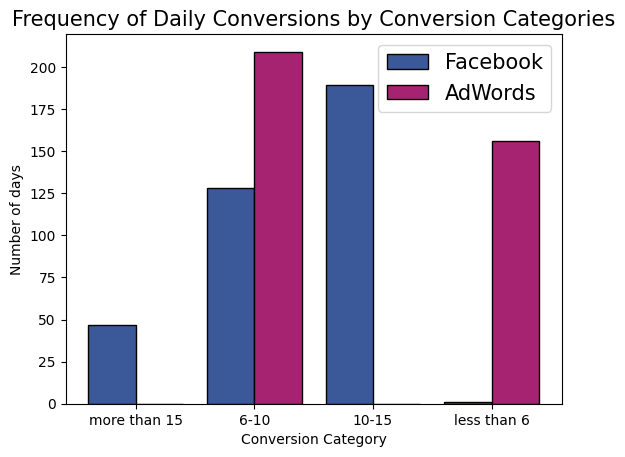

In [21]:
import numpy as np
import matplotlib.pyplot as plt

X_axis = np.arange(len(category_df))

plt.bar(X_axis - 0.2, category_df['Facebook_Count'], 0.4, label='Facebook', color='#3b5998', linewidth=1, edgecolor='k')
plt.bar(X_axis + 0.2, category_df['AdWords_Count'], 0.4, label='AdWords', color='#A62372', linewidth=1, edgecolor='k')

plt.xticks(X_axis, category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of days")
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


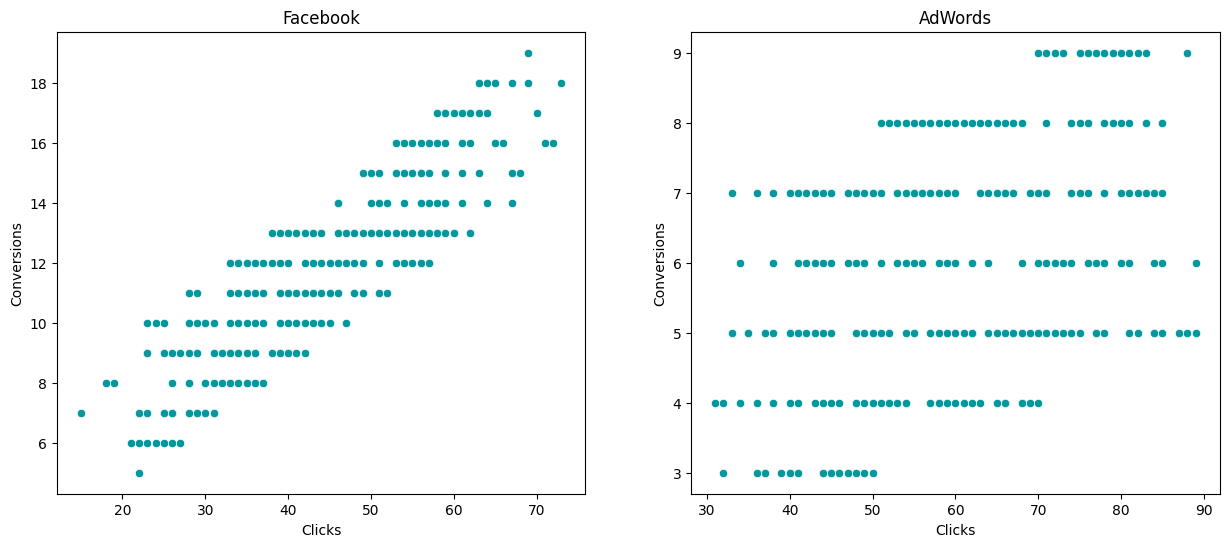

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x=df['AdWords Ad Clicks'], y=df['AdWords Ad Conversions'], color='#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.show()


In [24]:
facebook_corr = df[['Facebook Ad Conversions', 'Facebook Ad Clicks']].corr()
facebook_corr

adwords_corr = df[['AdWords Ad Conversions', 'AdWords Ad Clicks']].corr()
adwords_corr

print('Correlation Coeff \n------------------')
print('Facebook : ', round(facebook_corr.values[0,1], 2))
print('Adwords  : ', round(adwords_corr.values[0,1], 2))


Correlation Coeff 
------------------
Facebook :  0.87
Adwords  :  0.45
